# Messing Around With Classification Models
Len Huang, experimenting with scikit learn
https://towardsdatascience.com/solving-a-simple-classification-problem-with-python-fruits-lovers-edition-d20ab6b071d2
using the Spotify Top 50 2019 Songs dataset https://www.kaggle.com/leonardopena/top50spotify2019

In [186]:
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns

### Read in the CSV Data

In [187]:
songs_alot = pd.read_csv("top50.csv", index_col="Track.Name") 
songs_simple = pd.read_csv("simple_top50.csv", index_col="Track.Name")
songs = songs_simple
songs.head()

,id,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
Track.Name,,,,,,,,,,,,,
SeÒorita,1,Shawn Mendes,foreign pop,117,55,76,-6,8,75,191,4,3,79
China,2,Anuel AA,reggaeton,105,81,79,-4,8,61,302,8,9,92
boyfriend (with Social House),3,Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
Beautiful People (feat. Khalid),4,Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
Goodbyes (Feat. Young Thug),5,Post Malone,rap,150,65,58,-4,11,18,175,45,7,94


### Dataframe Info

In [188]:
print(songs['Genre'].unique())

['foreign pop' 'reggaeton' 'dance pop' 'pop' 'rap' 'hip hop' 'latin' 'edm']


In [189]:
print(songs.groupby('Genre').size())

Genre
dance pop       9
edm             6
foreign pop     5
hip hop         4
latin           6
pop            11
rap             5
reggaeton       4
dtype: int64


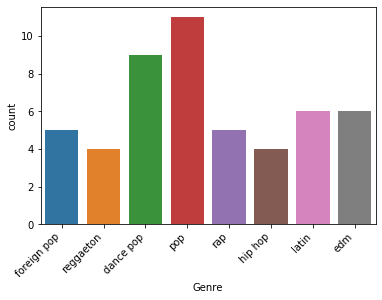

In [190]:
chart = sns.countplot(songs['Genre'],label="Count")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

### Visualization of the Inputs

In [191]:
# from pandas.plotting import scatter_matrix
# from matplotlib import cm 

In [192]:
labels = list(songs.columns)
inputs = labels[4:]
print(inputs)

['Energy', 'Danceability', 'Loudness..dB..', 'Liveness', 'Valence.', 'Length.', 'Acousticness..', 'Speechiness.', 'Popularity']


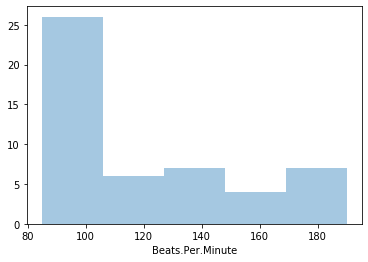

In [193]:
sns.distplot(songs["Beats.Per.Minute"], kde=False)
plt.show()

# TODO: Find a way to do more visualizations for the input and maybe 
#       add as a stage to let users see and decide which variables 
#       they would like to include as input

In [194]:
X = songs[inputs]
y = songs['Genre']
# print(X)

# Learning

We will be testing Logistic Regression, Decision Tree, K-Nearest Neighbors, Linear Discriminant Analysis, Gaussian Naive Bayes, and Support Vector Machine methods. To do so we import the following models / classifiers.

In [195]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

## Split Learning and Testing

In [196]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

Here we split our data into subsets to train on as well as to test on various algorithms. Read more about `train_test_split` here: https://www.bitdegree.org/learn/train-test-split

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

And then we clean the data with MinMax scaler to avoid any possible convergence errors. Read more about scaling here: https://towardsdatascience.com/preprocessing-with-sklearn-a-complete-and-comprehensive-guide-670cb98fcfb9

In [198]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Logistic Regression

In [199]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.3f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.3f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.432
Accuracy of Logistic regression classifier on test set: 0.154


### Decision Tree Classifier

In [200]:
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.3f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.3f}'
     .format(clf.score(X_test, y_test)))


Accuracy of Decision Tree classifier on training set: 1.000
Accuracy of Decision Tree classifier on test set: 0.231


### K-Nearest Neighbors

In [201]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.3f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.3f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.514
Accuracy of K-NN classifier on test set: 0.231


### Linear Discriminant Analysis

In [202]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.3f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.3f}'
     .format(lda.score(X_test, y_test)))

Accuracy of LDA classifier on training set: 0.676
Accuracy of LDA classifier on test set: 0.231


### Gaussian Naive Bayes

In [203]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.3f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.3f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.838
Accuracy of GNB classifier on test set: 0.231


### Support Vector Machine

In [204]:
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.3f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.3f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.459
Accuracy of SVM classifier on test set: 0.154


## Manual Learning / Testing 
Mess around with some tests of our model following https://machinelearningmastery.com/make-predictions-scikit-learn/

### Preparing Data
First we'll use a standard scaler to clean our data for training. I'll import the other scalers to choose from later. Again, refer to the following link for more info about scalers: https://towardsdatascience.com/preprocessing-with-sklearn-a-complete-and-comprehensive-guide-670cb98fcfb9

In [257]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler

scaler = StandardScaler()
# scaler = MinMaxScaler()
# scaler = MaxAbsScaler()
# scaler = RobustScaler()

X_scaled = scaler.fit_transform(X)
y_scaled = y

Then, just like before, we'll create the actual models.

In [258]:
logreg = LogisticRegression().fit(X_scaled,y_scaled)
clf = DecisionTreeClassifier().fit(X_scaled, y_scaled)
knn = KNeighborsClassifier().fit(X_scaled, y_scaled)
lda = LinearDiscriminantAnalysis().fit(X_scaled, y_scaled)
gnb = GaussianNB().fit(X_scaled, y_scaled)
svm = SVC().fit(X_scaled, y_scaled)

Let's pick a song and see if the models predict it correctly.

In [265]:
trackname = input("Song name: ")
row = songs.loc[trackname]
X_trial = [list(row[4:])]
y_actual = row[2]
print(row)

Song name: Ransom
id                          7
Artist.Name         Lil Tecca
Genre                     rap
Beats.Per.Minute          180
Energy                     64
Danceability               75
Loudness..dB..             -6
Liveness                    7
Valence.                   23
Length.                   131
Acousticness..              2
Speechiness.               29
Popularity                 92
Name: Ransom, dtype: object


In [261]:
log_guess = logreg.predict(X_trial)
clf_guess = clf.predict(X_trial)
knn_guess = knn.predict(X_trial)
lda_guess = lda.predict(X_trial)
gnb_guess = gnb.predict(X_trial)
svm_guess = svm.predict(X_trial)

In [262]:
print("The genre of " + trackname + " actually is " + y_actual)
print("Logarithmic Regression thought it was " + log_guess[0])
print("Decision Tree Classifier thought it was " + clf_guess[0])
print("K-Nearest Neighbors thought it was " + knn_guess[0])
print("Linear Discriminant Analysis thought it was " + lda_guess[0])
print("Gaussian Naive Bayes thought it was " + gnb_guess[0])
print("Support Vector Machine thought it was " + svm_guess[0])

The genre of Ransom actually is rap
Logarithmic Regression thought it was reggaeton
Decision Tree Classifier thought it was dance pop
K-Nearest Neighbors thought it was foreign pop
Linear Discriminant Analysis thought it was reggaeton
Gaussian Naive Bayes thought it was reggaeton
Support Vector Machine thought it was pop
